In [119]:
import pandas as pd
import numpy as np
pd.set_option('max_columns',None)
from datetime import date
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from xgboost import XGBRegressor

In [120]:
train = pd.read_csv(r'C:\Users\ezchave\Desktop\Work\Amex\train.csv')
campaign_data = pd.read_csv(r'C:\Users\ezchave\Desktop\Work\Amex\campaign_data.csv')
coupon_item_mapping = pd.read_csv(r'C:\Users\ezchave\Desktop\Work\Amex\coupon_item_mapping.csv')
customer_demographics = pd.read_csv(r'C:\Users\ezchave\Desktop\Work\Amex\customer_demographics.csv')
customer_transaction_data = pd.read_csv(r'C:\Users\ezchave\Desktop\Work\Amex\customer_transaction_data.csv')
item_data = pd.read_csv(r'C:\Users\ezchave\Desktop\Work\Amex\item_data.csv')
sample_submission = pd.read_csv(r'C:\Users\ezchave\Desktop\Work\Amex\sample_submission_Byiv0dS.csv')
test = pd.read_csv(r'C:\Users\ezchave\Desktop\Work\Amex\test_QyjYwdj.csv')


In [121]:
test = pd.read_csv(r'C:\Users\ezchave\Desktop\Work\Amex\test_QyjYwdj.csv')

### explore campaign_data

In [122]:
campaign_data.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


In [123]:
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
campaign_id      28 non-null int64
campaign_type    28 non-null object
start_date       28 non-null object
end_date         28 non-null object
dtypes: int64(1), object(3)
memory usage: 976.0+ bytes


In [124]:
campaign_data.campaign_type.unique()

array(['Y', 'X'], dtype=object)

In [125]:
# number of campaigns
campaign_data.campaign_id.unique().shape

(28,)

In [126]:
campaign_data.start_date = pd.to_datetime(campaign_data.start_date,dayfirst=True)
campaign_data.end_date = pd.to_datetime(campaign_data.end_date,dayfirst=True)

In [127]:
campaign_data['campaign_length'] = campaign_data.end_date - campaign_data.start_date

In [128]:
campaign_data

,campaign_id,campaign_type,start_date,end_date,campaign_length
0,24,Y,2013-10-21,2013-12-20,60 days
1,25,Y,2013-10-21,2013-11-22,32 days
2,20,Y,2013-09-07,2013-11-16,70 days
3,23,Y,2013-10-08,2013-11-15,38 days
4,21,Y,2013-09-16,2013-10-18,32 days
5,22,X,2013-09-16,2013-10-18,32 days
6,18,X,2013-08-10,2013-10-04,55 days
7,19,Y,2013-08-26,2013-09-27,32 days
8,17,Y,2013-07-29,2013-08-30,32 days
9,16,Y,2013-07-15,2013-08-16,32 days


In [129]:
campaign_data.campaign_length = campaign_data.campaign_length.dt.days

In [130]:
campaign_data.loc[campaign_data.campaign_length < 0,'start_date'],campaign_data.loc[campaign_data.campaign_length < 0,'end_date'] = campaign_data.loc[campaign_data.campaign_length < 0,'end_date'] ,campaign_data.loc[campaign_data.campaign_length < 0,'start_date']

In [131]:
campaign_data.sort_values('campaign_id',inplace=True)
campaign_data.reset_index(inplace=True,drop = True)

In [132]:
campaign_data.campaign_length = campaign_data.campaign_length.abs()

In [133]:
campaign_data.head()

,campaign_id,campaign_type,start_date,end_date,campaign_length
0,1,Y,2012-12-12,2013-01-18,37
1,2,Y,2012-12-17,2013-01-18,32
2,3,Y,2012-12-22,2013-02-16,56
3,4,Y,2013-01-07,2013-02-08,32
4,5,Y,2013-01-12,2013-02-15,34


In [134]:
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
campaign_id        28 non-null int64
campaign_type      28 non-null object
start_date         28 non-null datetime64[ns]
end_date           28 non-null datetime64[ns]
campaign_length    28 non-null int64
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 1.2+ KB


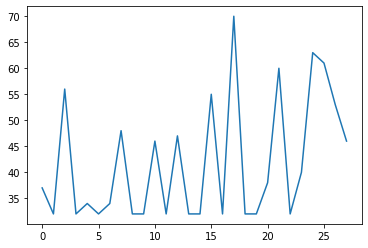

In [135]:
plt.plot(campaign_data.campaign_length)

{'bodies': [<matplotlib.collections.PolyCollection at 0x195a747e080>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x195a4456f60>,
 'cmins': <matplotlib.collections.LineCollection at 0x195a747e358>,
 'cbars': <matplotlib.collections.LineCollection at 0x195a747e198>}

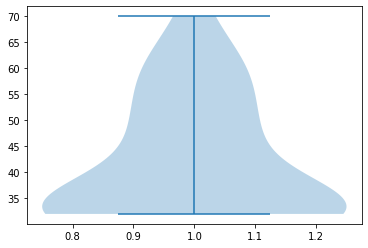

In [136]:
# most of the campaigns had less than 120 days length !
plt.violinplot(campaign_data.campaign_length)

### explore coupon_item_mapping

In [137]:
coupon_item_mapping.head()

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


In [138]:
coupon_item_mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92663 entries, 0 to 92662
Data columns (total 2 columns):
coupon_id    92663 non-null int64
item_id      92663 non-null int64
dtypes: int64(2)
memory usage: 1.4 MB


In [139]:
# number of type of coupons around
coupon_item_mapping.coupon_id.unique().shape

(1116,)

In [140]:
coupon_item_mapping = pd.merge(coupon_item_mapping,coupon_item_mapping.groupby('coupon_id').count().reset_index().rename(columns = {'item_id':'no_of_items'}),on='coupon_id',how='inner')

In [141]:
coupon_item_mapping.head()

,coupon_id,item_id,no_of_items
0,105,37,17
1,105,2360,17
2,105,9944,17
3,105,13208,17
4,105,17451,17


 ### explore customer_demographics

In [142]:
customer_demographics.head(10)

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5
5,11,70+,Single,0,2,NaN,1
6,12,46-55,Married,0,2,NaN,7
7,13,36-45,Single,0,1,NaN,2
8,14,26-35,Married,1,2,NaN,6
9,15,46-55,Married,0,2,NaN,6


In [143]:
customer_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
customer_id       760 non-null int64
age_range         760 non-null object
marital_status    431 non-null object
rented            760 non-null int64
family_size       760 non-null object
no_of_children    222 non-null object
income_bracket    760 non-null int64
dtypes: int64(3), object(4)
memory usage: 41.6+ KB


In [144]:
train[~train.customer_id.isin(customer_demographics.customer_id)]

,id,campaign_id,coupon_id,customer_id,redemption_status
3,7,13,644,1050,0
8,17,30,857,523,0
14,24,5,893,761,0
21,32,30,320,1255,0
25,39,26,326,63,0
26,42,30,363,88,0
28,45,8,383,1095,0
29,46,13,482,1096,0
30,48,26,813,919,0
34,55,30,500,91,0


In [145]:
customer_demographics.fillna(0,inplace=True)

In [146]:
# number of customers
customer_demographics.customer_id.unique().shape

(760,)

In [147]:
# customer age ranges
customer_demographics.age_range.unique()

array(['70+', '46-55', '26-35', '36-45', '18-25', '56-70'], dtype=object)

In [148]:
customer_demographics.age_range.replace('18-25',0,inplace = True)
customer_demographics.age_range.replace('26-35',1,inplace = True)
customer_demographics.age_range.replace('36-45',2,inplace = True)
customer_demographics.age_range.replace('46-55',3,inplace = True)
customer_demographics.age_range.replace('56-70',4,inplace = True)
customer_demographics.age_range.replace('70+',5,inplace = True)

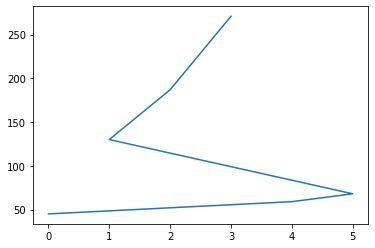

In [149]:
plt.plot(customer_demographics.age_range.value_counts())

In [150]:
customer_demographics.marital_status.value_counts()

0          329
Married    317
Single     114
Name: marital_status, dtype: int64

In [151]:
customer_demographics['marital_status'] = customer_demographics.marital_status.map(lambda x : 1 if x == 'Married' else 2 if x =='Single' else 3)

In [152]:
customer_demographics.rented.value_counts()

0    719
1     41
Name: rented, dtype: int64

In [153]:
customer_demographics.family_size.replace('5+','5',inplace=True)

In [154]:
customer_demographics.family_size.value_counts()

2    303
1    248
3    104
5     57
4     48
Name: family_size, dtype: int64

In [155]:
customer_demographics.no_of_children.value_counts()

0     538
1     107
3+     60
2      55
Name: no_of_children, dtype: int64

In [156]:
customer_demographics.no_of_children.replace('3+',3,inplace = True)

In [157]:
customer_demographics.income_bracket.value_counts()

5     187
4     165
6      88
3      70
2      68
1      59
8      37
7      32
9      29
12     10
10     10
11      5
Name: income_bracket, dtype: int64

In [158]:
customer_demographics.family_size = customer_demographics.family_size.astype(int)
customer_demographics.no_of_children = customer_demographics.no_of_children.astype(int)

### explore customer_transaction_data

In [159]:
customer_transaction_data.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [160]:
customer_transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324566 entries, 0 to 1324565
Data columns (total 7 columns):
date               1324566 non-null object
customer_id        1324566 non-null int64
item_id            1324566 non-null int64
quantity           1324566 non-null int64
selling_price      1324566 non-null float64
other_discount     1324566 non-null float64
coupon_discount    1324566 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 70.7+ MB


In [161]:
customer_transaction_data.date = pd.to_datetime(customer_transaction_data.date)

In [162]:
customer_transaction_data.customer_id.unique().shape

(1582,)

In [163]:
customer_transaction_data.coupon_discount.sum()

-787982.0900000004

In [164]:
customer_transaction_data['total_discount'] = customer_transaction_data.other_discount + customer_transaction_data.coupon_discount

In [165]:
customer_transaction_data.total_discount.sum()

-24323806.740000006

In [166]:
customer_transaction_data = pd.merge(customer_transaction_data,customer_transaction_data[['customer_id','total_discount']].groupby('customer_id').sum().reset_index(),on='customer_id',how = 'left')

In [167]:
customer_transaction_data.rename(columns = {'total_discount_x':'total_discount_transaction','total_discount_y':'total_discount_customer'},inplace=True)

In [168]:
customer_transaction_data['day'] = customer_transaction_data.date.dt.day

In [169]:
customer_transaction_data['dotw'] = customer_transaction_data.date.dt.strftime('%A')

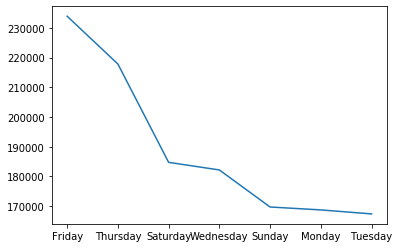

In [170]:
plt.plot(customer_transaction_data.dotw.value_counts())

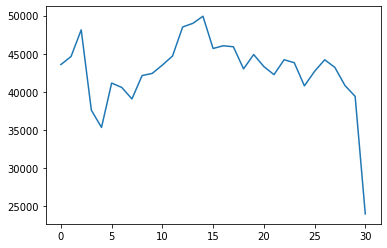

In [171]:
## shopping trends according to the day of the manth
plt.plot(pd.DataFrame(customer_transaction_data.day.value_counts()).reset_index().sort_values('index').reset_index(drop=True)['day'])

In [172]:
customer_transaction_data = pd.merge(customer_transaction_data,customer_transaction_data[['item_id','total_discount_transaction']].groupby('item_id').sum().reset_index(),on='item_id',how='inner')

In [173]:
customer_transaction_data.rename(columns= {'total_discount_transaction_x':'total_discount_transaction','total_discount_transaction_y':'item_ttl_discnt'},inplace=True)
customer_transaction_data.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,total_discount_transaction,total_discount_customer,day,dotw,item_ttl_discnt
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,-10.69,-7289.57,2,Monday,-224.45
1,2012-01-02,135,26830,1,35.26,-10.69,0.0,-10.69,-10704.39,2,Monday,-224.45
2,2012-01-02,464,26830,1,35.26,-10.69,0.0,-10.69,-81477.05,2,Monday,-224.45
3,2012-01-12,1185,26830,1,45.95,0.00,0.0,0.00,-5290.64,12,Thursday,-224.45
4,2012-01-13,1140,26830,1,45.95,0.00,0.0,0.00,-16854.23,13,Friday,-224.45


In [174]:
customer_transaction_data[customer_transaction_data.item_id == 300]

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,total_discount_transaction,total_discount_customer,day,dotw,item_ttl_discnt
1147075,2012-05-11,1225,300,1,35.62,0.00,0.0,0.00,-6763.46,11,Friday,-7.12
1147076,2012-05-29,1225,300,1,35.62,0.00,0.0,0.00,-6763.46,29,Tuesday,-7.12
1147077,2012-06-09,1225,300,1,28.50,-7.12,0.0,-7.12,-6763.46,9,Saturday,-7.12
1147078,2013-06-11,999,300,1,35.62,0.00,0.0,0.00,-14022.08,11,Tuesday,-7.12


In [175]:
customer_transaction_data['item_best_dotw'] = customer_transaction_data.groupby('item_id').dotw.transform(lambda x : (x).value_counts().idxmax())

In [176]:
customer_transaction_data['most_purchased_item'] = customer_transaction_data[['customer_id','item_id']].groupby('customer_id').item_id.transform(lambda x : (x).value_counts().idxmax())

In [177]:
customer_transaction_data['customer_best_dotw'] = customer_transaction_data.groupby('customer_id').dotw.transform(lambda x : (x).value_counts().idxmax())

In [178]:
customer_transaction_data.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,total_discount_transaction,total_discount_customer,day,dotw,item_ttl_discnt,item_best_dotw,most_purchased_item,customer_best_dotw
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,-10.69,-7289.57,2,Monday,-224.45,Thursday,26854,Thursday
1,2012-01-02,135,26830,1,35.26,-10.69,0.0,-10.69,-10704.39,2,Monday,-224.45,Thursday,48922,Thursday
2,2012-01-02,464,26830,1,35.26,-10.69,0.0,-10.69,-81477.05,2,Monday,-224.45,Thursday,49009,Monday
3,2012-01-12,1185,26830,1,45.95,0.00,0.0,0.00,-5290.64,12,Thursday,-224.45,Thursday,34047,Friday
4,2012-01-13,1140,26830,1,45.95,0.00,0.0,0.00,-16854.23,13,Friday,-224.45,Thursday,25759,Friday


In [179]:
customer_transaction_data['item_price'] = customer_transaction_data.selling_price + customer_transaction_data.total_discount_transaction

### explore item_data

In [180]:
item_data.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [181]:
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74066 entries, 0 to 74065
Data columns (total 4 columns):
item_id       74066 non-null int64
brand         74066 non-null int64
brand_type    74066 non-null object
category      74066 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [182]:
item_data.brand_type.value_counts()

Established    62842
Local          11224
Name: brand_type, dtype: int64

In [183]:
item_data.category.value_counts()

Grocery                   32448
Pharmaceutical            24471
Natural Products           2533
Dairy, Juices & Snacks     2425
Skin & Hair Care           2244
Meat                       2080
Packaged Meat              1966
Prepared Food              1880
Bakery                     1679
Seafood                     728
Flowers & Plants            664
Miscellaneous               385
Alcohol                     303
Garden                      102
Restauarant                  78
Salads                       40
Travel                       19
Fuel                         14
Vegetables (cut)              7
Name: category, dtype: int64

In [184]:
item_data = pd.merge(item_data,customer_transaction_data[['item_id','item_ttl_discnt','item_best_dotw']],on='item_id',how='left')

In [185]:
item_data.head()

,item_id,brand,brand_type,category,item_ttl_discnt,item_best_dotw
0,1,1,Established,Grocery,0.0,Tuesday
1,1,1,Established,Grocery,0.0,Tuesday
2,2,1,Established,Miscellaneous,0.0,Friday
3,3,56,Local,Bakery,0.0,Wednesday
4,4,56,Local,Grocery,0.0,Sunday


In [186]:
sample_submission.head()

,id,redemption_status
0,3,0
1,4,0
2,5,0
3,8,0
4,10,0


In [187]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [188]:
test.head()

,id,campaign_id,coupon_id,customer_id
0,3,22,869,967
1,4,20,389,1566
2,5,22,981,510
3,8,25,1069,361
4,10,17,498,811


In [189]:
sorted(test.campaign_id.unique())

[16, 17, 18, 19, 20, 21, 22, 23, 24, 25]

In [190]:
sorted(train.campaign_id.unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 26, 27, 28, 29, 30]

### making the feature dataframe now 

In [191]:
train = train.append(test)

C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [200]:
# taking campaign data into account 
print(train.shape)
train = pd.merge(train,campaign_data[['campaign_id','campaign_length','campaign_type']],on = 'campaign_id',how = 'inner')
print(train.shape)

(128595, 5)
(128595, 7)


In [201]:
# taking coupon data into account
train = pd.merge(train,pd.DataFrame(coupon_item_mapping['coupon_id'].value_counts()).reset_index().rename(columns = {'index':'coupon_id','coupon_id':'no_of_items_in_coupon'}),on = 'coupon_id',how='inner')
print(train.shape)

(128595, 8)


In [202]:
print(train.shape)

(128595, 8)


In [203]:
# taking customer's transaction data into account now
customer_transaction_data.head()
customer_transaction_data['recency'] =  pd.to_datetime('2013-09-03') - pd.to_datetime(customer_transaction_data['date'])
customer_transaction_data.recency = customer_transaction_data.recency.dt.days

In [204]:
train = pd.merge(train,customer_transaction_data[['customer_id','recency']].groupby('customer_id').min().reset_index(),on='customer_id',how = 'left')

In [205]:
train = pd.merge(train,customer_transaction_data[['customer_id','coupon_discount']].groupby('customer_id').mean().reset_index(),how='left',on='customer_id')
train.rename(columns = {'coupon_discount':'avg_coupon_discount'},inplace=True)

In [206]:
train = pd.merge(train,customer_transaction_data[['customer_id','quantity']].groupby('customer_id').sum().reset_index(),how='left',on='customer_id').rename(columns = {'quantity':'ttl_quantity'})


In [207]:
train['campaign_type_X'] = train['campaign_type'].map(lambda x :1 if x == 'X' else 0)
train.drop('campaign_type',axis=1,inplace=True)

In [208]:
train = pd.merge(train,customer_demographics,how='left',on='customer_id')

In [209]:
train.head()

,campaign_id,coupon_id,customer_id,id,redemption_status,campaign_length,no_of_items_in_coupon,recency,avg_coupon_discount,ttl_quantity,campaign_type_X,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,13,27,1053,1,0.0,47,125,64,-0.287258,105551,1,3.0,3.0,0.0,1.0,0.0,5.0
1,13,27,1168,370,0.0,47,125,62,-1.447444,36727,1,0.0,1.0,1.0,2.0,0.0,4.0
2,13,27,1061,554,0.0,47,125,62,-0.976282,1960,1,2.0,2.0,0.0,1.0,0.0,3.0
3,13,27,1240,1958,0.0,47,125,67,-0.264591,1116,1,1.0,1.0,0.0,5.0,3.0,5.0
4,13,27,351,2075,0.0,47,125,83,-0.248629,15955,1,NaN,NaN,NaN,NaN,NaN,NaN


In [210]:
item_data.shape

(1324569, 6)

In [211]:
item_data.drop_duplicates().shape

(74066, 6)

In [212]:
item_data.item_id.unique().shape

(74066,)

In [213]:
train = pd.merge(train,coupon_item_mapping[['coupon_id','no_of_items']].drop_duplicates(),on='coupon_id',how='left')

In [214]:
train = pd.merge(train,customer_transaction_data[['customer_id','most_purchased_item','customer_best_dotw']].drop_duplicates(),on='customer_id',how = 'left')

In [215]:
train = pd.merge(train,customer_transaction_data[['item_id','item_best_dotw']].drop_duplicates(),left_on='most_purchased_item',right_on='item_id',how='left')

In [216]:
train.head()

,campaign_id,coupon_id,customer_id,id,redemption_status,campaign_length,no_of_items_in_coupon,recency,avg_coupon_discount,ttl_quantity,campaign_type_X,age_range,marital_status,rented,family_size,no_of_children,income_bracket,no_of_items,most_purchased_item,customer_best_dotw,item_id,item_best_dotw
0,13,27,1053,1,0.0,47,125,64,-0.287258,105551,1,3.0,3.0,0.0,1.0,0.0,5.0,125,14458,Wednesday,14458,Thursday
1,13,27,1168,370,0.0,47,125,62,-1.447444,36727,1,0.0,1.0,1.0,2.0,0.0,4.0,125,45069,Friday,45069,Friday
2,13,27,1061,554,0.0,47,125,62,-0.976282,1960,1,2.0,2.0,0.0,1.0,0.0,3.0,125,64193,Friday,64193,Friday
3,13,27,1240,1958,0.0,47,125,67,-0.264591,1116,1,1.0,1.0,0.0,5.0,3.0,5.0,125,31662,Thursday,31662,Thursday
4,13,27,351,2075,0.0,47,125,83,-0.248629,15955,1,NaN,NaN,NaN,NaN,NaN,NaN,125,7354,Thursday,7354,Thursday


In [217]:
train = pd.get_dummies(train,columns = {'item_best_dotw','customer_best_dotw'} )

In [218]:
my_imputer = Imputer()
train_ = my_imputer.fit_transform(train.drop('redemption_status',axis=1))
x = pd.DataFrame(train_)
x.columns = train.drop('redemption_status',axis=1).columns
x['redemption_status'] = train.redemption_status

C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [219]:
train.shape

(128595, 34)

In [220]:
x.head()

,campaign_id,coupon_id,customer_id,id,campaign_length,no_of_items_in_coupon,recency,avg_coupon_discount,ttl_quantity,campaign_type_X,age_range,marital_status,rented,family_size,no_of_children,income_bracket,no_of_items,most_purchased_item,item_id,item_best_dotw_Friday,item_best_dotw_Monday,item_best_dotw_Saturday,item_best_dotw_Sunday,item_best_dotw_Thursday,item_best_dotw_Tuesday,item_best_dotw_Wednesday,customer_best_dotw_Friday,customer_best_dotw_Monday,customer_best_dotw_Saturday,customer_best_dotw_Sunday,customer_best_dotw_Thursday,customer_best_dotw_Tuesday,customer_best_dotw_Wednesday,redemption_status
0,13.0,27.0,1053.0,1.0,47.0,125.0,64.0,-0.287258,105551.0,1.0,3.000000,3.000000,0.000000,1.000000,0.000000,5.000000,125.0,14458.0,14458.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,13.0,27.0,1168.0,370.0,47.0,125.0,62.0,-1.447444,36727.0,1.0,0.000000,1.000000,1.000000,2.000000,0.000000,4.000000,125.0,45069.0,45069.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13.0,27.0,1061.0,554.0,47.0,125.0,62.0,-0.976282,1960.0,1.0,2.000000,2.000000,0.000000,1.000000,0.000000,3.000000,125.0,64193.0,64193.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13.0,27.0,1240.0,1958.0,47.0,125.0,67.0,-0.264591,1116.0,1.0,1.000000,1.000000,0.000000,5.000000,3.000000,5.000000,125.0,31662.0,31662.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,13.0,27.0,351.0,2075.0,47.0,125.0,83.0,-0.248629,15955.0,1.0,2.414182,1.982158,0.056461,2.241877,0.588298,4.843539,125.0,7354.0,7354.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [94]:
x.age_range = x.age_range.round()
x.marital_status = x.marital_status.round()
x.rented = x.rented.round()
x.family_size = x.family_size.round()
x.no_of_children = x.no_of_children.round()
x.income_bracket = x.income_bracket.round()


In [221]:
x1 = pd.get_dummies(x,columns = {'age_range','marital_status','rented','family_size','no_of_children','income_bracket'})
x1.head()

,campaign_id,coupon_id,customer_id,id,campaign_length,no_of_items_in_coupon,recency,avg_coupon_discount,ttl_quantity,campaign_type_X,no_of_items,most_purchased_item,item_id,item_best_dotw_Friday,item_best_dotw_Monday,item_best_dotw_Saturday,item_best_dotw_Sunday,item_best_dotw_Thursday,item_best_dotw_Tuesday,item_best_dotw_Wednesday,customer_best_dotw_Friday,customer_best_dotw_Monday,customer_best_dotw_Saturday,customer_best_dotw_Sunday,customer_best_dotw_Thursday,customer_best_dotw_Tuesday,customer_best_dotw_Wednesday,redemption_status,no_of_children_0.0,no_of_children_0.5882975871313673,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0,rented_0.0,rented_0.056461126005361933,rented_1.0,income_bracket_1.0,income_bracket_2.0,income_bracket_3.0,income_bracket_4.0,income_bracket_4.843538873994638,income_bracket_5.0,income_bracket_6.0,income_bracket_7.0,income_bracket_8.0,income_bracket_9.0,income_bracket_10.0,income_bracket_11.0,income_bracket_12.0,family_size_1.0,family_size_2.0,family_size_2.2418766756032174,family_size_3.0,family_size_4.0,family_size_5.0,marital_status_1.0,marital_status_1.9821581769436998,marital_status_2.0,marital_status_3.0,age_range_0.0,age_range_1.0,age_range_2.0,age_range_2.414182305630027,age_range_3.0,age_range_4.0,age_range_5.0
0,13.0,27.0,1053.0,1.0,47.0,125.0,64.0,-0.287258,105551.0,1.0,125.0,14458.0,14458.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,13.0,27.0,1168.0,370.0,47.0,125.0,62.0,-1.447444,36727.0,1.0,125.0,45069.0,45069.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,13.0,27.0,1061.0,554.0,47.0,125.0,62.0,-0.976282,1960.0,1.0,125.0,64193.0,64193.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,13.0,27.0,1240.0,1958.0,47.0,125.0,67.0,-0.264591,1116.0,1.0,125.0,31662.0,31662.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
4,13.0,27.0,351.0,2075.0,47.0,125.0,83.0,-0.248629,15955.0,1.0,125.0,7354.0,7354.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [225]:
train1 = x1[~x1.redemption_status.isna()]
test1 = x1[x1.redemption_status.isna()]


### Start fitting the model

In [226]:
# Create train and test set 
y = train1.redemption_status
X = train1.drop({'redemption_status','id'},axis=1)
train_X, test_X, train_y, test_y = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.25)
print("predictors in train set : ", train_X.shape)
print("target in train set : ", train_y.shape)
print("predictors in test set : ", test_X.shape)
print("target in  test set : ", test_y.shape)



predictors in train set :  (58776, 64)
target in train set :  (58776,)
predictors in test set :  (19593, 64)
target in  test set :  (19593,)


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [ ]:
kf = StratifiedKFold(n_splits=10, shuffle = True, random_state = 228)
fold_splits = kf.split(train, target)
cv_scores = []
pred_full_test = 0
pred_train = np.zeros((train.shape[0]))
i = 1

5

In [112]:
# taking campaign data into account 
print(test.shape)
test = pd.merge(test,campaign_data[['campaign_id','campaign_length','campaign_type']],on = 'campaign_id',how = 'inner')
print(test.shape)

# taking coupon data into account
test = pd.merge(test,pd.DataFrame(coupon_item_mapping['coupon_id'].value_counts()).reset_index().rename(columns = {'index':'coupon_id','coupon_id':'no_of_items_in_coupon'}),on = 'coupon_id',how='inner')
print(test.shape)

print(test.shape)

# taking customer's transaction data into account now
customer_transaction_data.head()
customer_transaction_data['recency'] =  pd.to_datetime('2013-09-03') - pd.to_datetime(customer_transaction_data['date'])
customer_transaction_data.recency = customer_transaction_data.recency.dt.days

test = pd.merge(test,customer_transaction_data[['customer_id','recency']].groupby('customer_id').min().reset_index(),on='customer_id',how = 'left')

test = pd.merge(test,customer_transaction_data[['customer_id','coupon_discount']].groupby('customer_id').mean().reset_index(),how='left',on='customer_id')
test.rename(columns = {'coupon_discount':'avg_coupon_discount'},inplace=True)

test = pd.merge(test,customer_transaction_data[['customer_id','quantity']].groupby('customer_id').sum().reset_index(),how='left',on='customer_id').rename(columns = {'quantity':'ttl_quantity'})


test['campaign_type_X'] = test['campaign_type'].map(lambda x :1 if x == 'X' else 0)
test.drop('campaign_type',axis=1,inplace=True)

test = pd.merge(test,customer_demographics,how='left',on='customer_id')

test.head()

item_data.shape

item_data.drop_duplicates().shape

item_data.item_id.unique().shape

test = pd.merge(test,coupon_item_mapping[['coupon_id','no_of_items']].drop_duplicates(),on='coupon_id',how='left')

test = pd.merge(test,customer_transaction_data[['customer_id','most_purchased_item','customer_best_dotw']].drop_duplicates(),on='customer_id',how = 'left')

test = pd.merge(test,customer_transaction_data[['item_id','item_best_dotw']].drop_duplicates(),left_on='most_purchased_item',right_on='item_id',how='left')

test.head()

test = pd.get_dummies(test,columns = {'item_best_dotw','customer_best_dotw'} )


(50226, 4)
(50226, 6)
(50226, 7)
(50226, 7)


In [115]:
X.head()

,campaign_id,coupon_id,customer_id,campaign_length,no_of_items_in_coupon,recency,avg_coupon_discount,ttl_quantity,campaign_type_X,no_of_items,most_purchased_item,item_id,item_best_dotw_Friday,item_best_dotw_Monday,item_best_dotw_Saturday,item_best_dotw_Sunday,item_best_dotw_Thursday,item_best_dotw_Tuesday,item_best_dotw_Wednesday,customer_best_dotw_Friday,customer_best_dotw_Monday,customer_best_dotw_Saturday,customer_best_dotw_Sunday,customer_best_dotw_Thursday,customer_best_dotw_Tuesday,customer_best_dotw_Wednesday,no_of_children_0.0,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0,rented_0.0,rented_1.0,income_bracket_1.0,income_bracket_2.0,income_bracket_3.0,income_bracket_4.0,income_bracket_5.0,income_bracket_6.0,income_bracket_7.0,income_bracket_8.0,income_bracket_9.0,income_bracket_10.0,income_bracket_11.0,income_bracket_12.0,family_size_1.0,family_size_2.0,family_size_3.0,family_size_4.0,family_size_5.0,marital_status_1.0,marital_status_2.0,marital_status_3.0,age_range_0.0,age_range_1.0,age_range_2.0,age_range_3.0,age_range_4.0,age_range_5.0
0,13.0,27.0,1053.0,47.0,125.0,64.0,-0.287258,105551.0,1.0,125.0,14458.0,14458.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
1,13.0,27.0,1168.0,47.0,125.0,62.0,-1.447444,36727.0,1.0,125.0,45069.0,45069.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
2,13.0,27.0,1061.0,47.0,125.0,62.0,-0.976282,1960.0,1.0,125.0,64193.0,64193.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
3,13.0,27.0,1240.0,47.0,125.0,67.0,-0.264591,1116.0,1.0,125.0,31662.0,31662.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0
4,13.0,27.0,351.0,47.0,125.0,83.0,-0.248629,15955.0,1.0,125.0,7354.0,7354.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0


In [116]:
test.drop({'id'},axis=1).head()

,campaign_id,coupon_id,customer_id,campaign_length,no_of_items_in_coupon,recency,avg_coupon_discount,ttl_quantity,campaign_type_X,age_range,marital_status,rented,family_size,no_of_children,income_bracket,no_of_items,most_purchased_item,item_id,item_best_dotw_Friday,item_best_dotw_Monday,item_best_dotw_Saturday,item_best_dotw_Sunday,item_best_dotw_Thursday,item_best_dotw_Tuesday,item_best_dotw_Wednesday,customer_best_dotw_Friday,customer_best_dotw_Monday,customer_best_dotw_Saturday,customer_best_dotw_Sunday,customer_best_dotw_Thursday,customer_best_dotw_Tuesday,customer_best_dotw_Wednesday
0,22,869,967,32,72,68,-1.550558,16644,1,2.0,3.0,0.0,1.0,0.0,5.0,72,24396,24396,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,22,869,742,32,72,67,-0.318985,58177,1,3.0,3.0,0.0,2.0,0.0,2.0,72,28243,28243,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,22,869,1103,32,72,63,-0.163571,1060691,1,1.0,1.0,0.0,2.0,0.0,4.0,72,49009,49009,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,22,869,963,32,72,64,-0.034740,39575,1,NaN,NaN,NaN,NaN,NaN,NaN,72,34047,34047,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,22,869,433,32,72,63,-1.646791,1637,1,NaN,NaN,NaN,NaN,NaN,NaN,72,17441,17441,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [231]:
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)
test_op = []
i=0
for train_index, test_index in skf.split(X, y):
    print(" iteration : ",i)
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    my_model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                        colsample_bytree=1, gamma=0,
                        learning_rate=0.1, max_delta_step=0,
                        max_depth=3, min_child_weight=1, 
                        missing=None, n_estimators=100,
                        n_jobs=1, nthread=None, 
                        objective='reg:linear', random_state=0,
                        reg_alpha=0, reg_lambda=1, 
                        scale_pos_weight=1, seed=None,
                        silent=True, subsample=1)

    my_model.fit(X_train, y_train, verbose=False)

    """
    XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
           colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
           max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
           n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
           reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
           silent=True, subsample=1)
    """

    # Performance sur le train
    train_y_pred = my_model.predict(X_train)
    auc = roc_auc_score(y_train, train_y_pred)
    print("Performance train for iteration  ",i," is : ", auc)

    # Performance sur le test
    test_y_pred = my_model.predict(X_test)
    auc = roc_auc_score(y_test, test_y_pred)
    print("Performance test for iteration  ",i," is : ", auc)
    print(' ##################################################################################### ')
    
    # Calculate for test now 
    test_op.append(my_model.predict(test1.drop({'id','redemption_status'},axis=1)))

 iteration :  0
TRAIN: [ 8751  8754  8763 ... 78366 78367 78368] TEST: [    0     1     2 ... 15829 15830 15831]


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Performance train for iteration   0  is :  0.9358967709965421
Performance test for iteration   0  is :  0.8465255870085325
 ##################################################################################### 
 iteration :  0
TRAIN: [    0     1     2 ... 78366 78367 78368] TEST: [ 8751  8754  8763 ... 31505 31506 31507]


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Performance train for iteration   0  is :  0.9289280063326096
Performance test for iteration   0  is :  0.7946469215134128
 ##################################################################################### 
 iteration :  0
TRAIN: [    0     1     2 ... 78366 78367 78368] TEST: [15111 15152 15154 ... 47112 47113 47114]


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Performance train for iteration   0  is :  0.9295873862123024
Performance test for iteration   0  is :  0.7873895940519291
 ##################################################################################### 
 iteration :  0
TRAIN: [    0     1     2 ... 78366 78367 78368] TEST: [30787 30798 30816 ... 62751 62752 62753]


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Performance train for iteration   0  is :  0.9338942328935148
Performance test for iteration   0  is :  0.7393896928570924
 ##################################################################################### 
 iteration :  0
TRAIN: [    0     1     2 ... 62751 62752 62753] TEST: [51467 51470 51474 ... 78366 78367 78368]


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Performance train for iteration   0  is :  0.9378324473950724
Performance test for iteration   0  is :  0.8087548188811313
 ##################################################################################### 


In [241]:
for i in range(len(test_op)):
    test['op_'+str(i+1)] = test_op[i]


In [247]:
test.head(20)

,id,campaign_id,coupon_id,customer_id,op_1,op_2,op_3,op_4,op_5
0,3,22,869,967,0.007791,0.026099,0.002153,0.011909,0.003891
1,4,20,389,1566,0.028902,0.056779,0.017723,0.067963,0.034509
2,5,22,981,510,0.101861,0.088142,0.042702,0.195175,0.060667
3,8,25,1069,361,0.011325,0.001323,0.004450,0.016191,0.005265
4,10,17,498,811,0.038887,0.069544,0.031062,0.089669,0.074008
5,12,25,44,1498,0.012292,0.026932,0.004654,0.015743,0.004383
6,13,18,713,682,0.035101,0.065541,0.027709,0.079360,0.067896
7,16,22,1079,1186,0.028704,0.030354,0.016814,0.063189,0.032600
8,18,18,199,1023,0.008724,0.002703,-0.000987,0.017510,0.006008
9,31,22,583,315,0.009779,0.000247,0.001651,0.011074,-0.002523


In [252]:
test['op_final'] = test.op_1 + test.op_2 + test.op_3 + test.op_4 + test.op_5


In [253]:
test.op_final =test.op_final/5

In [262]:
test.rename(columns = {'op_final':'redemption_status'},inplace=True)

In [263]:
test.head()

,id,campaign_id,coupon_id,customer_id,op_1,op_2,op_3,op_4,op_5,redemption_status
0,3,22,869,967,0.007791,0.026099,0.002153,0.011909,0.003891,0.010369
1,4,20,389,1566,0.028902,0.056779,0.017723,0.067963,0.034509,0.041175
2,5,22,981,510,0.101861,0.088142,0.042702,0.195175,0.060667,0.097709
3,8,25,1069,361,0.011325,0.001323,0.004450,0.016191,0.005265,0.007711
4,10,17,498,811,0.038887,0.069544,0.031062,0.089669,0.074008,0.060634


In [265]:
test[['id','redemption_status']].to_csv(r'C:\Users\ezchave\Desktop\Work\Amex\submission_9_withneg.csv',index=None)